In [20]:
# Importing Packages
import matplotlib.pyplot as plt
import random
import numpy as np

In [21]:
# Rates of Students
normal_student_rates = {
    'Rate-Up Char': 0.007,
    '3 Star': 0.023,
    '2 Star': 0.185,
    '1 Star': 0.785
}

# Student Rates during Fest Banners
fest_student_rates = {
    'Rate-Up Char': 0.007,
    'Fest Char': 0.003,
    '3 Star': 0.05,
    '2 Star': 0.185,
    '1 Star': 0.755
}


In [ ]:
# Pulling 10 Students
def simulate_10_pull():
    # Pulling 10 Students
    students = []
    for i in range(10):
        # Random Number
        rand = random.random()

        # Getting Student
        if rand <= 0.007:
            students.append('Rate-Up Char')
        elif rand <= 0.03:
            students.append('3 Star')
        elif rand <= 0.215:
            students.append('2 Star')
        else:
            students.append('1 Star')
    return students

In [22]:
# Pull Function
def simulate_pulls(rates, num_pulls):
    rate_up_obtained = False
    for _ in range(num_pulls):
        random_number = random.random()
        cumulative_prob = 0
        for student, prob in rates.items():
            cumulative_prob += prob
            if random_number <= cumulative_prob:
                if student == 'Rate-Up Char' or student == 'Fest Char':
                    rate_up_obtained = True
                    break
                elif student != '1 Star':
                    break
        if rate_up_obtained:
            break

    return rate_up_obtained


In [23]:
# Number of simulations
num_simulations = 10000
max_pulls = 200
pulls_interval = 10

In [24]:
# Perform simulations for normal rates
normal_probabilities = []
for num_pulls in range(10, max_pulls + 1, pulls_interval):
    rate_up_count = sum(simulate_pulls(normal_student_rates, num_pulls) for _ in range(num_simulations))
    rate_up_probability = rate_up_count / num_simulations
    normal_probabilities.append(rate_up_probability)

# Perform simulations for fest rates
fest_probabilities = []
for num_pulls in range(10, max_pulls + 1, pulls_interval):
    rate_up_count = sum(simulate_pulls(fest_student_rates, num_pulls) for _ in range(num_simulations))
    rate_up_probability = rate_up_count / num_simulations
    fest_probabilities.append(rate_up_probability)


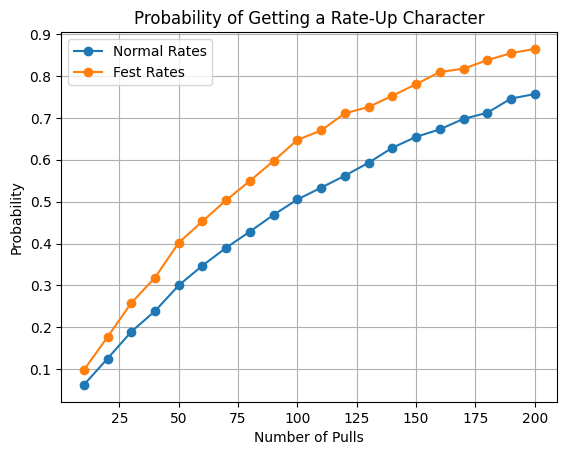

In [25]:
# Plotting
x_values = list(range(10, max_pulls + 1, pulls_interval))

plt.plot(x_values, normal_probabilities, label='Normal Rates', marker='o')
plt.plot(x_values, fest_probabilities, label='Fest Rates', marker='o')
plt.xlabel('Number of Pulls')
plt.ylabel('Probability')
plt.title('Probability of Getting a Rate-Up Character')
plt.legend()
plt.grid(True)
plt.show()